In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
fraud=pd.read_csv('Fraud_check.csv')

In [3]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


# `EDA`

In [4]:
fraud.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


In [5]:
fraud.drop('City.Population',axis=1,inplace=True)

In [6]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban
0,NO,Single,68833,10,YES
1,YES,Divorced,33700,18,YES
2,NO,Married,36925,30,YES
3,YES,Single,50190,15,YES
4,NO,Married,81002,28,NO


In [7]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   Work.Experience  600 non-null    int64 
 4   Urban            600 non-null    object
dtypes: int64(2), object(3)
memory usage: 23.6+ KB


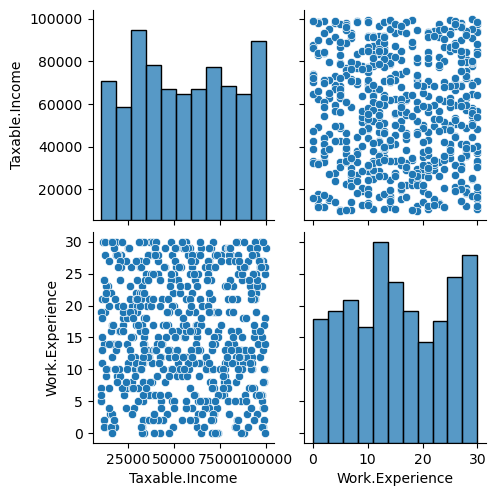

In [8]:
sns.pairplot(data=fraud)

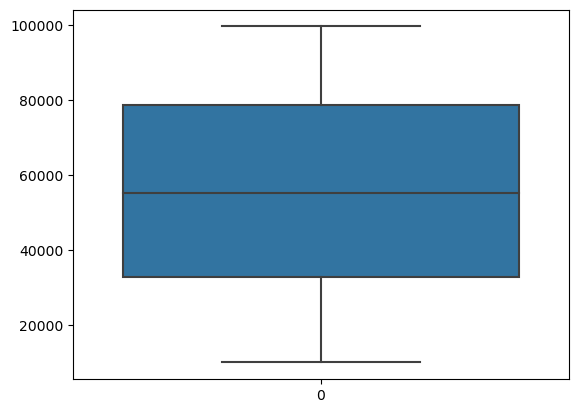

In [28]:
sns.boxplot(data=fraud['Taxable.Income']);

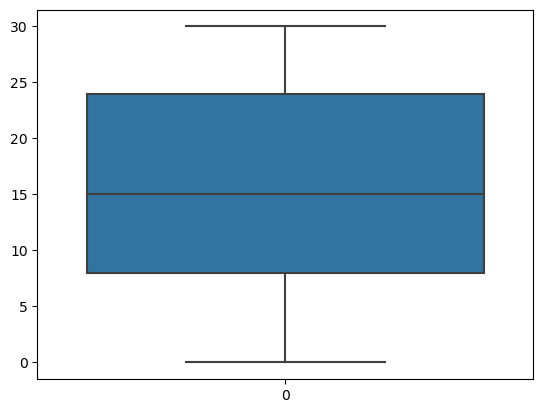

In [29]:
sns.boxplot(data=fraud['Work.Experience']);

# `Insights`
1) Both Work Experience and Taxable Income doesnt have outliers

<Axes: >

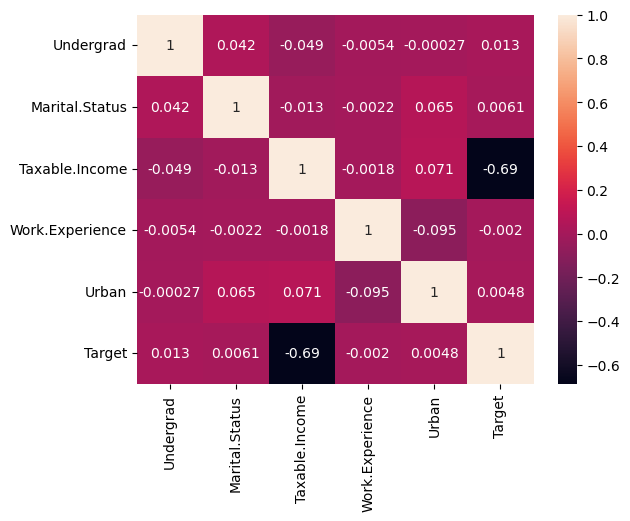

In [34]:
sns.heatmap(fraud.corr(),annot=True)

# `Insights`
1) Urban have a positive correlation with taxable Income
2) Taxable Income and target have a negative correlation between them

# `Converting Target Column to given Condition`

In [9]:
y=np.empty(600, dtype=object)
i=0

In [10]:
for value in fraud['Taxable.Income']:
    if value<=30000:
        y[i]='Risky'
    else:
        y[i]='Good'
    i=i+1

In [11]:
df=pd.DataFrame(y,columns=['Target'])
df

,Target
0,Good
1,Good
2,Good
3,Good
4,Good
...,...
595,Good
596,Good
597,Good
598,Good


In [12]:
fraud=pd.concat([fraud,df],axis=1)
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban,Target
0,NO,Single,68833,10,YES,Good
1,YES,Divorced,33700,18,YES,Good
2,NO,Married,36925,30,YES,Good
3,YES,Single,50190,15,YES,Good
4,NO,Married,81002,28,NO,Good


In [13]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   Work.Experience  600 non-null    int64 
 4   Urban            600 non-null    object
 5   Target           600 non-null    object
dtypes: int64(2), object(4)
memory usage: 28.3+ KB


# `Label Encoding`

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le=LabelEncoder()

In [16]:
fraud['Undergrad']=le.fit_transform(fraud['Undergrad'])
fraud['Urban']=le.fit_transform(fraud['Urban'])
fraud['Marital.Status']=le.fit_transform(fraud['Marital.Status'])
fraud['Target']=le.fit_transform(fraud['Target'])

In [17]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban,Target
0,0,2,68833,10,1,0
1,1,0,33700,18,1,0
2,0,1,36925,30,1,0
3,1,2,50190,15,1,0
4,0,1,81002,28,0,0


In [18]:
x=fraud.drop(['Target'],axis=1)

In [19]:
y=fraud[['Target']]

# `Splitting the Data and Applying Decision tree`

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [22]:
model=DecisionTreeClassifier(criterion='entropy')

In [23]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [24]:
x_pred=model.predict(x_test)

In [25]:
x_pred

array([1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [26]:
model.score(x_test,y_test)

1.0